# Home Loan Prediction 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.pylab as pylab

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.datasets import make_blobs
import seaborn as sns
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

# Questions we like to ask and have answer at the end

In [2]:
# What kind of the groups / people are likely to get home loan approved 
# what are the factors that affect the loan approval the most 
# What Machine learning model can predict home loan approval 
# which is the best Machine learning model to predict 

In [3]:
data=pd.read_csv("C:/Users/OEM/OneDrive/Desktop/Mini Project 3/train.csv")

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.drop(['Loan_ID'], axis=1,inplace=True)

In [11]:
data['Dependents'].replace('3+',3,inplace=True)

In [12]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

In [14]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [15]:
new_data=data.fillna(0)

In [16]:
new_data['Gender']=new_data['Gender'].replace(0,new_data['Gender'].mode()[0])
new_data['Self_Employed']=new_data['Self_Employed'].replace(0,new_data['Self_Employed'].mode()[0])
new_data['Loan_Amount_Term']=new_data['Loan_Amount_Term'].replace(0,new_data['Loan_Amount_Term'].mode()[0])
new_data['LoanAmount']=new_data['LoanAmount'].replace(0,new_data['LoanAmount'].median())

In [17]:
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [18]:
new_data["Loan_Status"].count()

614

In [19]:
new_data["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Text(0, 0.5, 'Percentage')

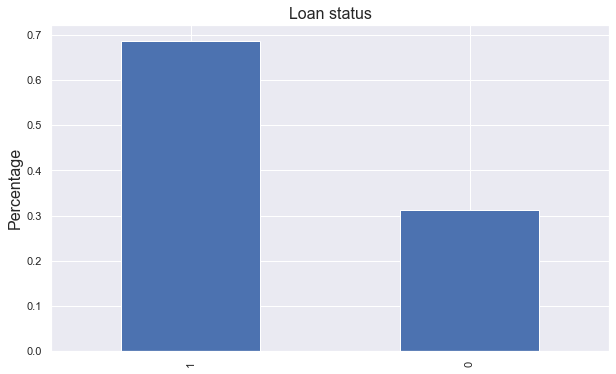

In [20]:
new_data["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')
plt.title('Loan status', fontsize=16)
plt.ylabel('Percentage',fontsize=16)

In [21]:
new_data["Self_Employed"].count()

614

In [22]:
new_data["Self_Employed"].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:title={'center':'Self_Employed'}>

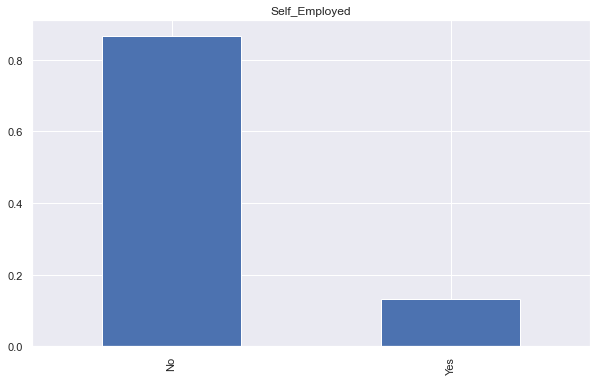

In [23]:
new_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

Loan_Status    0    1
Gender               
Female        37   75
Male         155  347


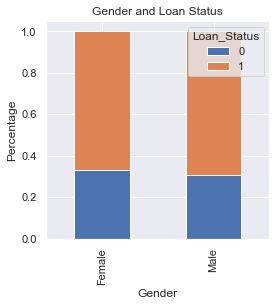

In [24]:
print(pd.crosstab(new_data["Gender"],new_data["Loan_Status"]))
Gender = pd.crosstab(new_data["Gender"],new_data["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title('Gender and Loan Status')
plt.show()

Loan_Status      0    1
Credit_History         
0.0             95   44
1.0             97  378


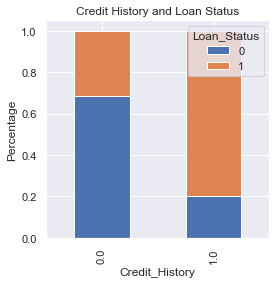

In [25]:
print(pd.crosstab(new_data["Credit_History"],new_data["Loan_Status"]))
CreditHistory = pd.crosstab(new_data["Credit_History"],new_data["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.title('Credit History and Loan Status')
plt.show()

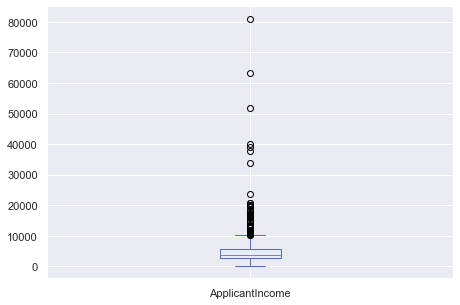

In [26]:
plt.subplot(122)
new_data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 1.0, 'Correlation Map')

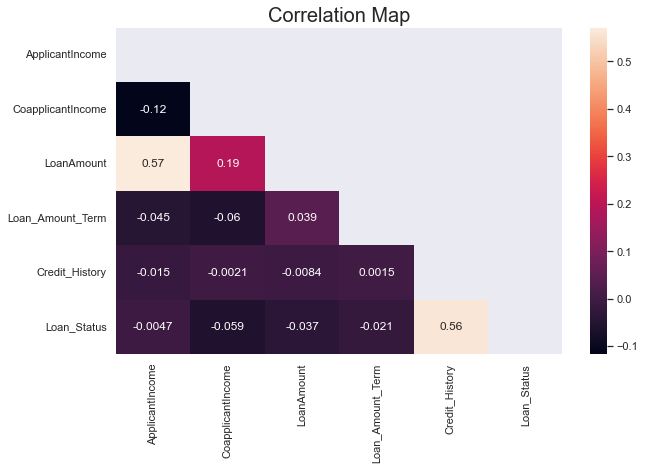

In [27]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,mask=matrix,)
plt.title('Correlation Map', fontsize = 20)

In [28]:
new_data["TotalIncome"]=new_data["ApplicantIncome"]+new_data["CoapplicantIncome"]

In [29]:
new_data["TotalIncome_log"]=np.log(new_data["TotalIncome"])

In [30]:
new_data["LoanAmount_log"]=np.log(new_data["LoanAmount"])

In [31]:
new_data["repayment_per_term"]=new_data["LoanAmount"]/new_data["Loan_Amount_Term"]

In [32]:
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log,repayment_per_term
0,Male,No,0,Graduate,No,5849,0.0,125.0,360.0,1.0,Urban,1,5849.0,8.674026,4.828314,0.347222
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,8.714568,4.852030,0.355556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,8.006368,4.189655,0.183333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,8.505323,4.787492,0.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,8.699515,4.948760,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,2900.0,7.972466,4.262680,0.197222
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,4106.0,8.320205,3.688879,0.222222
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,8312.0,9.025456,5.533389,0.702778
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,7583.0,8.933664,5.231109,0.519444


In [33]:
new_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
LoanAmount_log        0
repayment_per_term    0
dtype: int64

In [34]:
new_data=pd.get_dummies(new_data)


In [35]:
new_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log,repayment_per_term,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,125.0,360.0,1.0,1,5849.0,8.674026,4.828314,0.347222,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,6091.0,8.714568,4.852030,0.355556,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,3000.0,8.006368,4.189655,0.183333,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4941.0,8.505323,4.787492,0.333333,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,6000.0,8.699515,4.948760,0.391667,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,2900.0,7.972466,4.262680,0.197222,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,4106.0,8.320205,3.688879,0.222222,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,8312.0,9.025456,5.533389,0.702778,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,7583.0,8.933664,5.231109,0.519444,...,0,0,1,1,0,1,0,0,0,1


In [36]:
X=new_data.drop(['Loan_Status','TotalIncome','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
y=new_data['Loan_Status']

In [37]:
X

,Credit_History,TotalIncome_log,LoanAmount_log,repayment_per_term,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Dependents_0,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,8.674026,4.828314,0.347222,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
1,1.0,8.714568,4.852030,0.355556,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,1.0,8.006368,4.189655,0.183333,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,1.0,8.505323,4.787492,0.333333,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,1.0,8.699515,4.948760,0.391667,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,7.972466,4.262680,0.197222,1,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
610,1.0,8.320205,3.688879,0.222222,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
611,1.0,9.025456,5.533389,0.702778,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
612,1.0,8.933664,5.231109,0.519444,0,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

# Logistic Regression model

In [39]:
logistic_model=LogisticRegression()

In [40]:
logistic_model.fit(X_train, y_train)

C:\Users\OEM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
logistic_model.score(X_test,y_test)

0.7642276422764228

In [42]:
logistic_model.score(X_train,y_train)

0.7637474541751528

In [43]:
y_pred= logistic_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

[[15 24]
 [ 5 79]]


C:\Users\OEM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


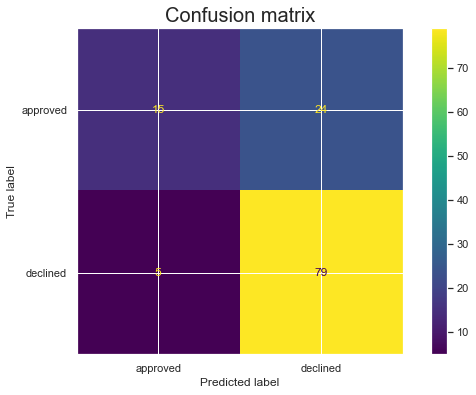

In [100]:
class_names = ['approved', 'declined']
plot_confusion_matrix(logistic_model, X_test, y_test, normalize=None, display_labels=class_names)
plt.title("Confusion matrix",fontsize = 20)
plt.show()

# Decision Tree Model

In [45]:
DT_model = DecisionTreeClassifier()

In [46]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
DT_model.score(X_test,y_test)

0.6585365853658537

In [48]:
y_pred= DT_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.6585365853658537

[Text(0.5263020833333333, 0.975, 'X[0] <= 0.5\ngini = 0.429\nsamples = 491\nvalue = [153, 338]'),
 Text(0.33229166666666665, 0.925, 'X[3] <= 1.189\ngini = 0.446\nsamples = 116\nvalue = [77, 39]'),
 Text(0.2534722222222222, 0.875, 'X[1] <= 8.817\ngini = 0.429\nsamples = 109\nvalue = [75, 34]'),
 Text(0.12916666666666668, 0.825, 'X[1] <= 7.748\ngini = 0.464\nsamples = 82\nvalue = [52, 30]'),
 Text(0.11805555555555555, 0.775, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.14027777777777778, 0.775, 'X[2] <= 4.6\ngini = 0.478\nsamples = 76\nvalue = [46, 30]'),
 Text(0.05555555555555555, 0.725, 'X[10] <= 0.5\ngini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.044444444444444446, 0.675, 'X[1] <= 8.183\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.022222222222222223, 0.625, 'X[1] <= 7.896\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.011111111111111112, 0.575, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.03333333333333333, 0.575, 'X[3] <= 0.211\ngini = 0.32\nsam

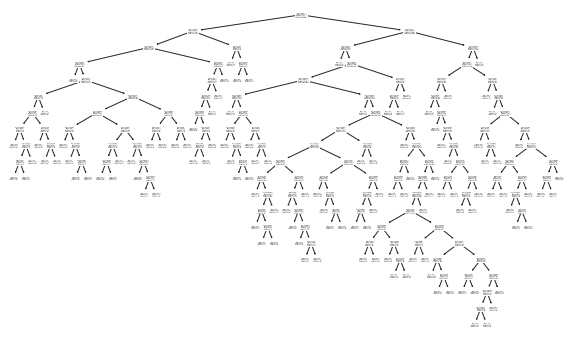

In [50]:
tree.plot_tree(DT_model)

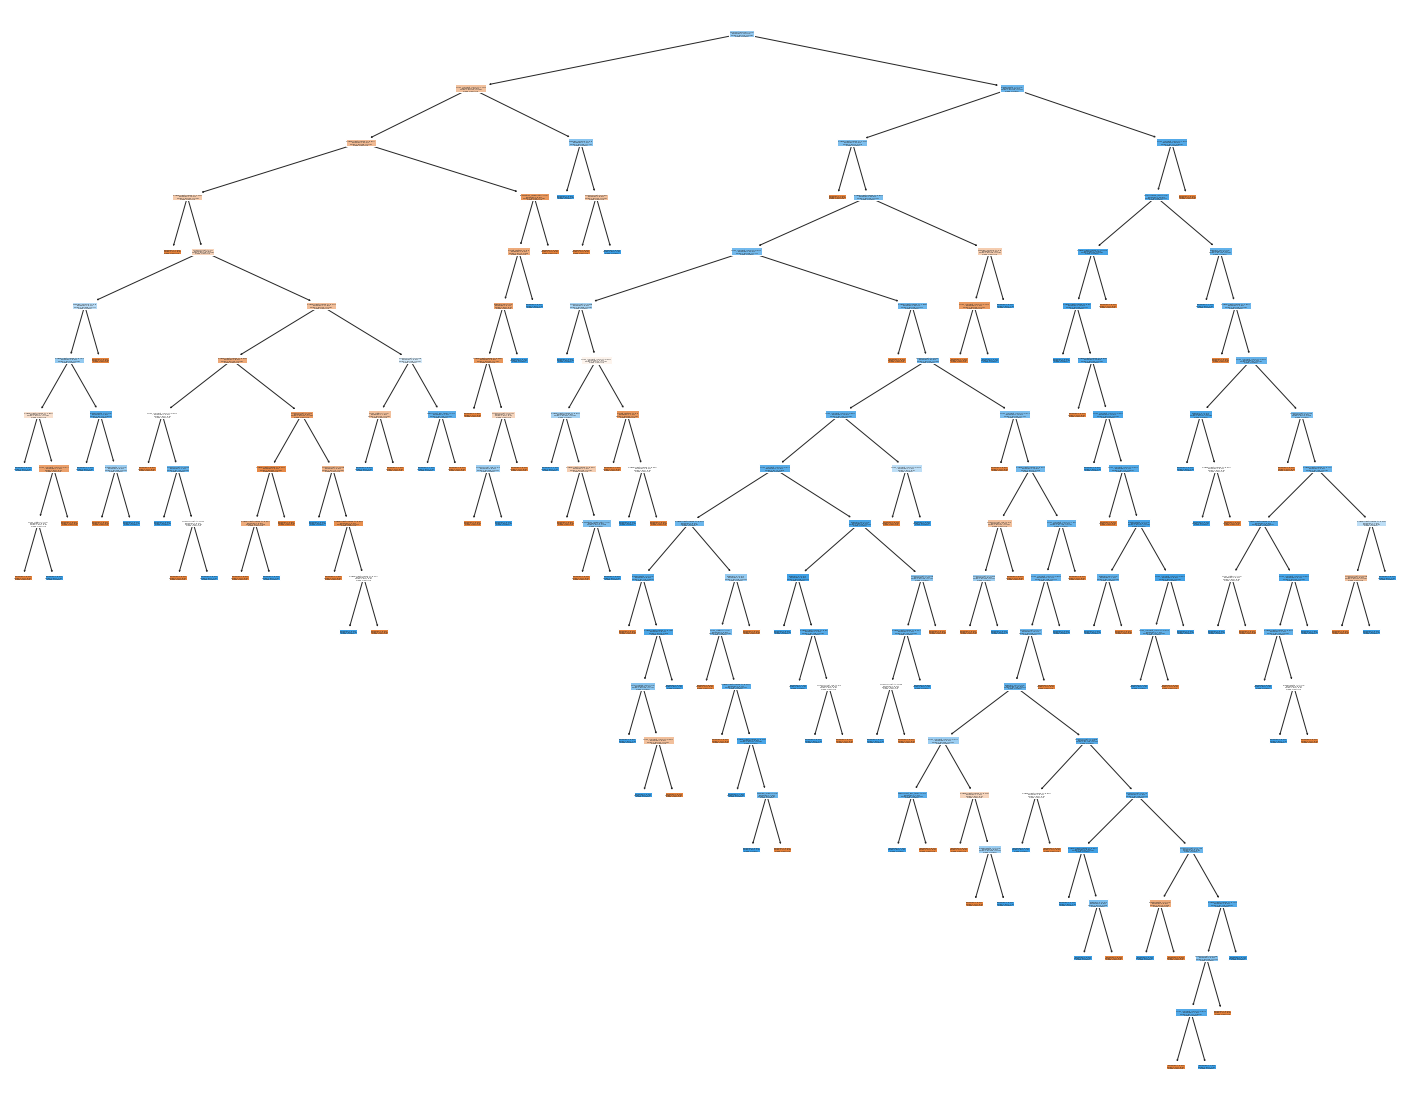

In [51]:
fig = plt.figure(figsize=((25,20)))
tree.plot_tree(DT_model,
            feature_names = new_data.columns,
            class_names=['Decline', 'Prove'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')

In [52]:
# Decision Tree Hyperparameter Tuning 
# Random Search 

In [53]:
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [54]:
Random_model  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [55]:
Random_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [56]:
Random_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       min_samples_split=4)

In [57]:
Random_model=DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=4)

In [58]:
Random_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=4)

In [59]:
Random_model.score(X_test,y_test)

0.7317073170731707

In [60]:
Random_model.score(X_train,y_train)

0.7718940936863544

[Text(0.48097826086956524, 0.9166666666666666, 'X[14] <= 0.5\nentropy = 0.895\nsamples = 491\nvalue = [153, 338]'),
 Text(0.2554347826086957, 0.75, 'X[2] <= 4.883\nentropy = 0.962\nsamples = 101\nvalue = [39, 62]'),
 Text(0.14130434782608695, 0.5833333333333334, 'X[4] <= 0.5\nentropy = 0.914\nsamples = 73\nvalue = [24, 49]'),
 Text(0.08695652173913043, 0.4166666666666667, 'X[16] <= 0.5\nentropy = 0.928\nsamples = 64\nvalue = [22, 42]'),
 Text(0.043478260869565216, 0.25, 'X[18] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.021739130434782608, 0.08333333333333333, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.06521739130434782, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.13043478260869565, 0.25, 'X[1] <= 7.82\nentropy = 0.949\nsamples = 57\nvalue = [21, 36]'),
 Text(0.10869565217391304, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.15217391304347827, 0.08333333333333333, 'entropy = 0.918\nsamples =

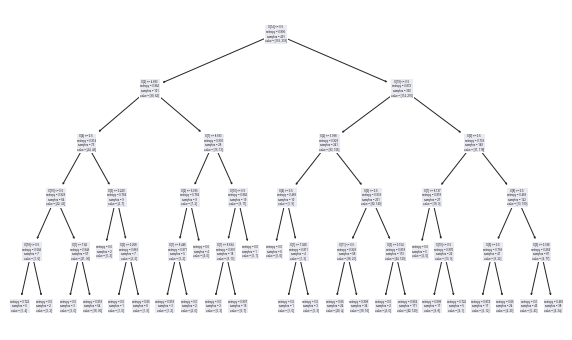

In [61]:
tree.plot_tree(Random_model)

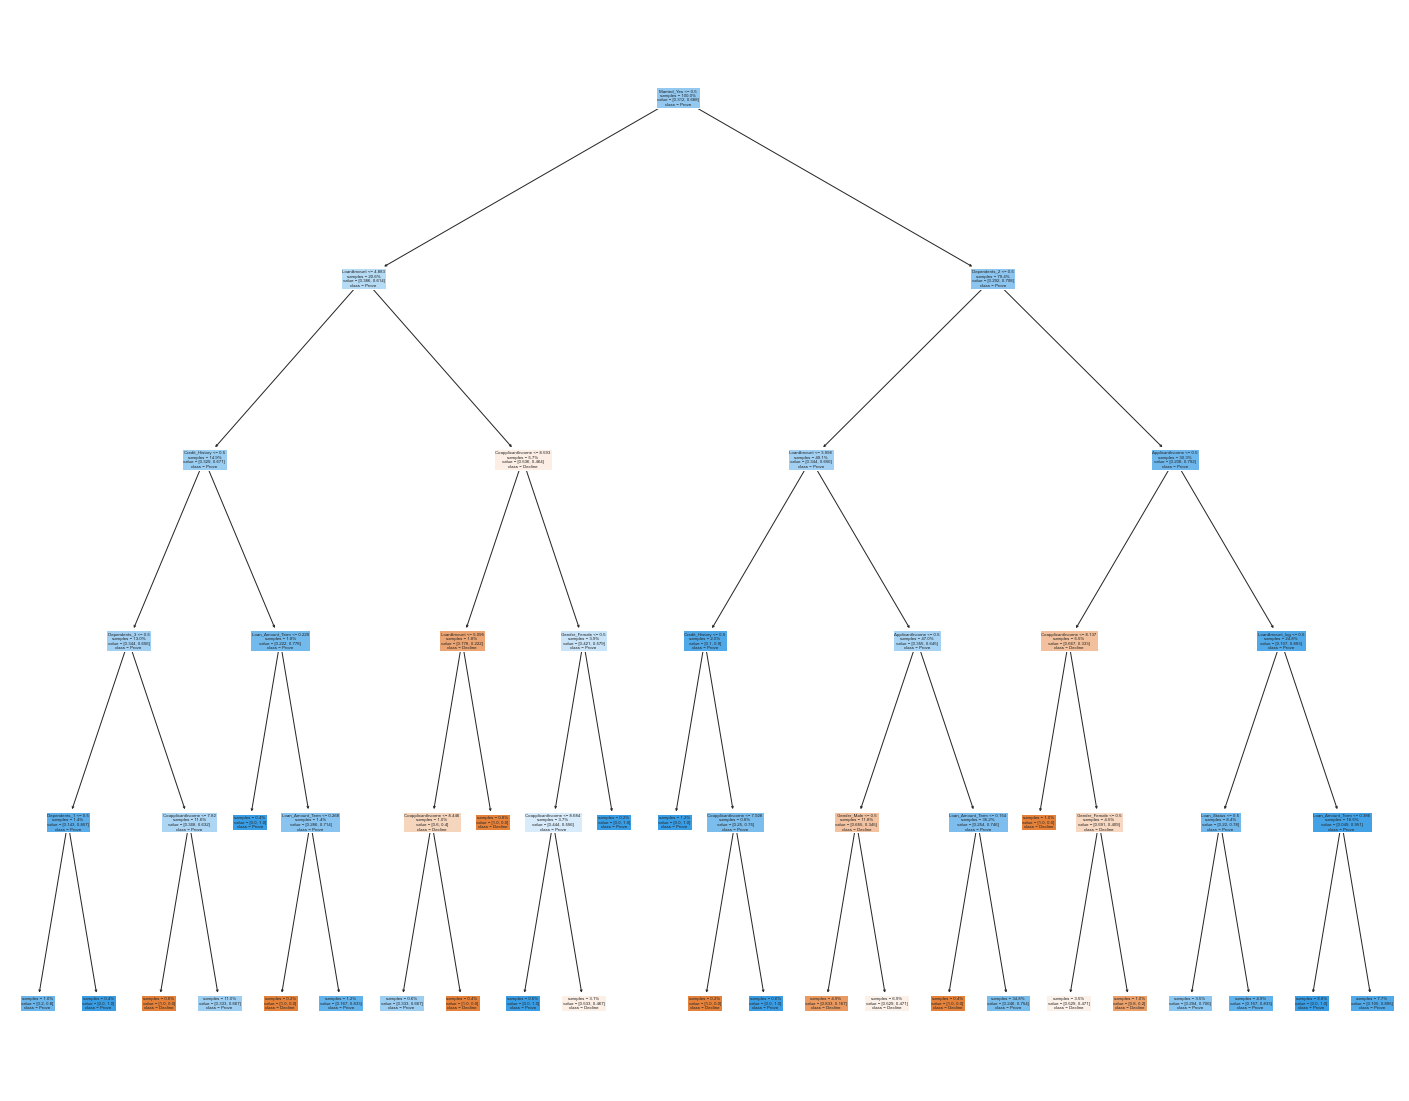

In [62]:
fig = plt.figure(figsize=((25,20)))
tree.plot_tree(Random_model,
            feature_names = new_data.columns,
            class_names=['Decline', 'Prove'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')

In [63]:
# Decision Tree Hyperparameter Tuning 
# Grid Search

In [64]:
parameters = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

In [65]:
Grid_DT_model  =  GridSearchCV(DecisionTreeClassifier(), parameters,scoring="accuracy", n_jobs=-1, cv =3, verbose = 1)

In [66]:
Grid_DT_model.fit(X_train,y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [67]:
Grid_DT_model.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'splitter': 'random'}

In [68]:
Grid_DT_model=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf= 1,min_samples_split= 2, splitter = 'random')

In [69]:
Grid_DT_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

In [70]:
Grid_DT_model.score(X_test,y_test)

0.7886178861788617

[Text(0.4583333333333333, 0.875, 'X[0] <= 0.62\nentropy = 0.895\nsamples = 491\nvalue = [153, 338]'),
 Text(0.25, 0.625, 'X[9] <= 0.833\nentropy = 0.921\nsamples = 116\nvalue = [77, 39]'),
 Text(0.16666666666666666, 0.375, 'X[11] <= 0.006\nentropy = 0.93\nsamples = 113\nvalue = [74, 39]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.867\nsamples = 52\nvalue = [37, 15]'),
 Text(0.25, 0.125, 'entropy = 0.967\nsamples = 61\nvalue = [37, 24]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.625, 'X[19] <= 0.599\nentropy = 0.727\nsamples = 375\nvalue = [76, 299]'),
 Text(0.5, 0.375, 'X[1] <= 8.132\nentropy = 0.826\nsamples = 231\nvalue = [60, 171]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.978\nsamples = 29\nvalue = [12, 17]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.791\nsamples = 202\nvalue = [48, 154]'),
 Text(0.8333333333333334, 0.375, 'X[7] <= 0.452\nentropy = 0.503\nsamples = 144\nvalue = [16, 128]'),
 Text(0.

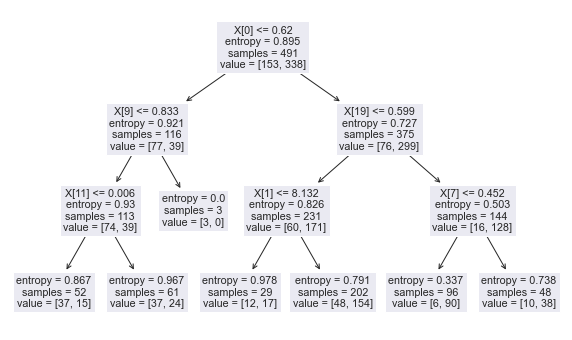

In [71]:
tree.plot_tree(Grid_DT_model)

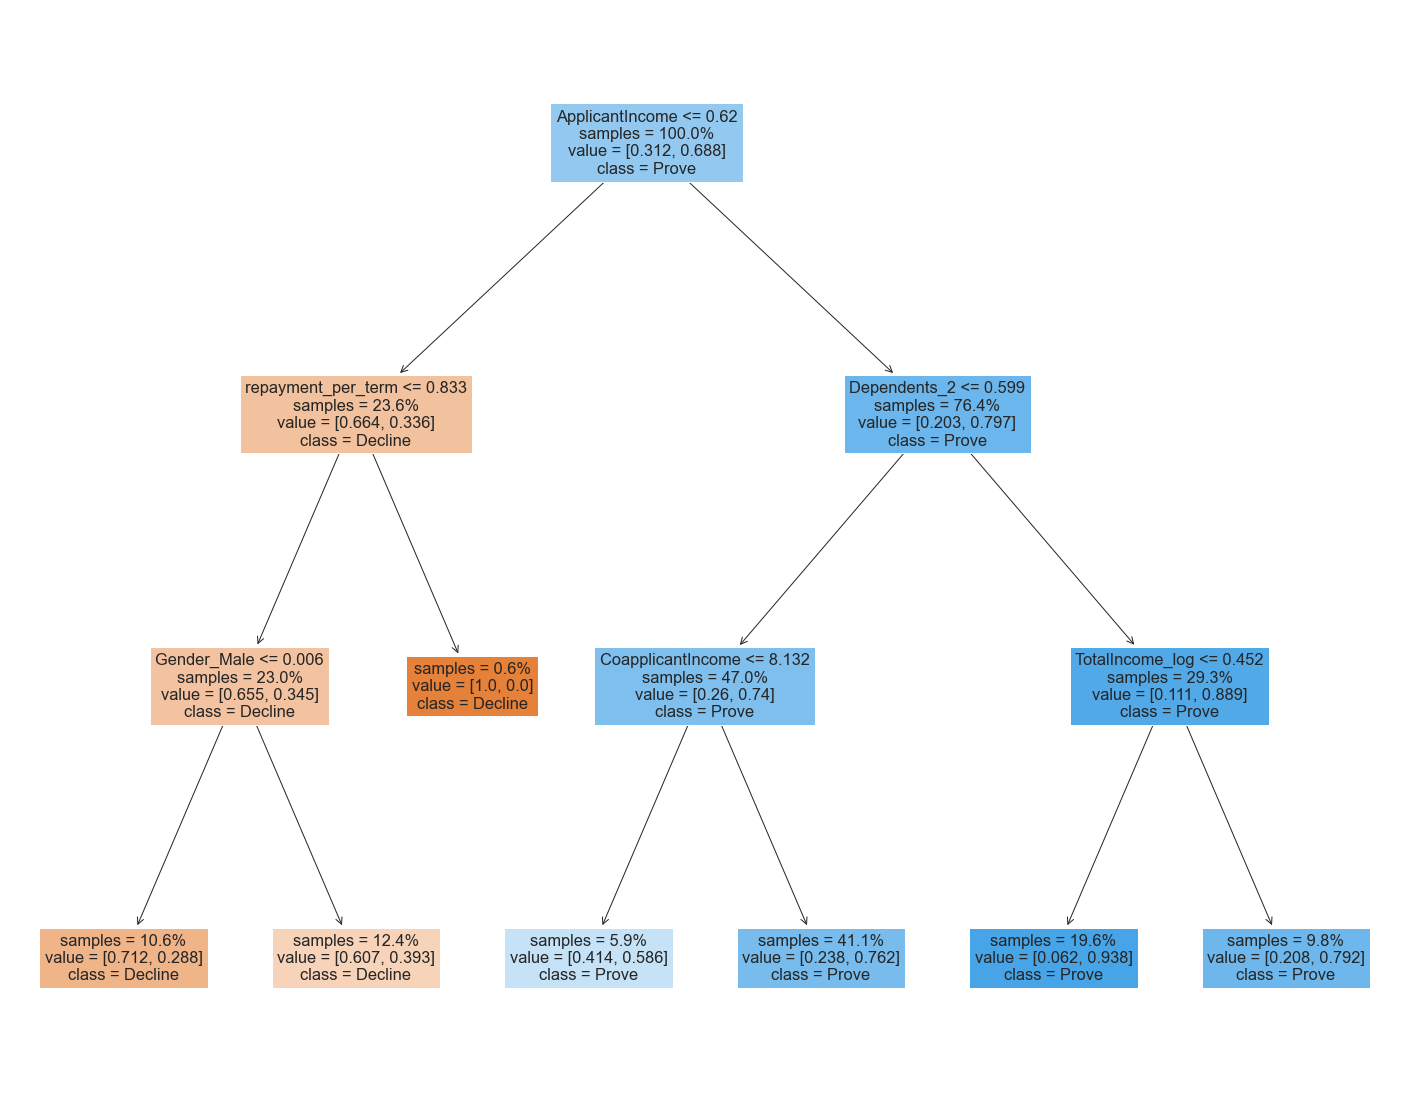

In [72]:
fig = plt.figure(figsize=((25,20)))
tree.plot_tree(Grid_DT_model,
            feature_names = new_data.columns,
            class_names=['Decline', 'Prove'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')

<AxesSubplot:>

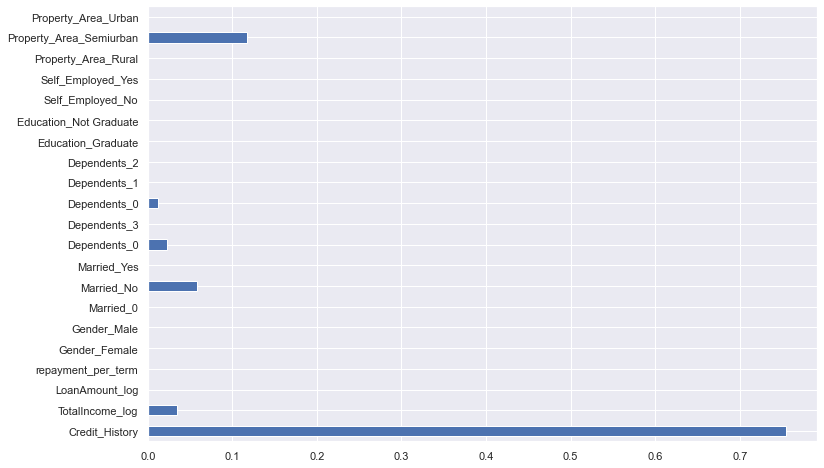

In [73]:
importances = pd.Series(Grid_DT_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# RandomFrorest

In [74]:
RF_model = RandomForestClassifier()

In [75]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
RF_model.score(X_test,y_test)

0.6991869918699187

In [77]:
y_pred= RF_model.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.6991869918699187

In [79]:
# Random Forest Hyperparameter Tuning 
# Grid Search

In [80]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [81]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [82]:
Grid_RF_model = RandomForestClassifier()

In [83]:
rf_Grid = GridSearchCV(estimator = Grid_RF_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [84]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [85]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 41}

In [86]:
rf_Grid.score(X_test,y_test)

0.7723577235772358

In [87]:
Grid_RF_model = RandomForestClassifier(bootstrap=False, max_depth=4, max_features = 'auto',
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators=64, random_state=1)

In [88]:
Grid_RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=64, random_state=1)

In [89]:
Grid_RF_model.score(X_train, y_train)

0.790224032586558

In [90]:
Grid_RF_model.score(X_test, y_test)

0.7560975609756098

Text(0.5, 1.0, 'Most Important Features')

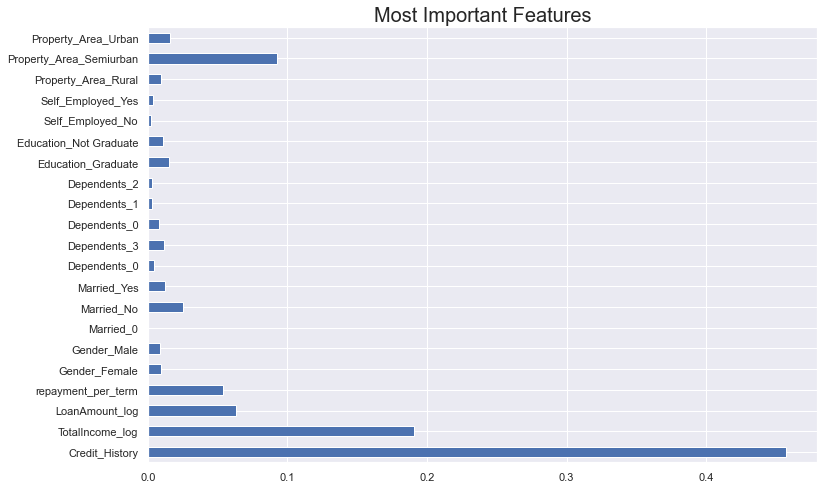

In [104]:
importances = pd.Series(Grid_RF_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.title('Most Important Features', fontsize=20)